In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
import pandas as pd
cov_data=pd.read_csv('/content/gdrive/My Drive/Rabab_covid/data_covid.csv',sep=';')

In [ ]:
len(cov_data)

137417

In [ ]:
cov_data

In [ ]:
cov_data.columns

Index(['Daily / Cumulative', 'Indicator', 'Date', 'Event', 'City', 'Region',
       'Cases (person)'],
      dtype='object')

In [ ]:
cov_data.shape

(89971, 7)

In [ ]:
#cov_data['Cases(person)'].sum()

In [ ]:
cov_data['Indicator'].unique()

array(['Cases'], dtype=object)

In [ ]:
cov_data['Daily / Cumulative'].unique()

array(['Daily', 'Cumulative'], dtype=object)

In [ ]:
cov_data_sub=cov_data[(cov_data['Daily / Cumulative']=='Daily')& (cov_data['Indicator']=='Cases')&(cov_data['Region']!='Total') ]

In [ ]:
len(cov_data_sub)

42710

In [ ]:
print('max',cov_data_sub['Date'].max())
print('min',cov_data_sub['Date'].min())

max 2021-08-23
min 2020-03-02


In [ ]:
cov_data_sub = cov_data_sub.rename(columns={'Cases (person)': 'Cases(person)'})

In [ ]:
cov_data_sub1=cov_data_sub.groupby(['Date','Region'],as_index=False)['Cases(person)'].sum()

In [ ]:
cov_data_sub1

,Date,Region,Cases(person)
0,2020-03-02,Eastern Region,1
1,2020-03-04,Eastern Region,1
2,2020-03-05,Eastern Region,3
3,2020-03-07,Eastern Region,2
4,2020-03-08,Eastern Region,4
...,...,...,...
6432,2021-08-23,Jazan,34
6433,2021-08-23,Makkah Al Mukarramah,66
6434,2021-08-23,Najran,16
6435,2021-08-23,Northern Borders,11


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#from sklearn import tree
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import average_precision_score
#from sklearn.metrics import roc_curve, roc_auc_score, auc
#from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from scipy.stats import randint
# from sklearn.ensemble import ExtraTreesClassifier
# import joblib
# from sklearn.tree import export_graphviz
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn import svm
# from sklearn.feature_selection import RFE
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.decomposition import PCA
# from sklearn.model_selection import StratifiedKFold
# from matplotlib.legend_handler import HandlerLine2D
# from sklearn.neighbors import KNeighborsClassifier

Forcasting using linear regression

LINEAR REGRESSING does not work well 

In [ ]:
cov_data_sub1.index = pd.to_datetime(cov_data_sub1.Date,format='%y/%m/%d', infer_datetime_format=True)
cov_prl=cov_data_sub1.drop(['Date','class','year','day','month'],axis=1)

In [ ]:
cov_prl

,Region,Cases(person)
Date,,
2020-03-02,6,1
2020-03-04,6,1
2020-03-05,6,3
2020-03-07,6,2
2020-03-08,6,4
...,...,...
2021-08-23,8,34
2021-08-23,9,66
2021-08-23,10,16


In [ ]:
X = cov_prl.drop('Cases(person)',axis=1)#[['Region','Date']].values
y = cov_prl['Cases(person)'].values
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3)
print('xtrain',len(x_train1))
print('xtrain',len(x_test1))

xtrain 4505
xtrain 1932


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train1) 
scaled_train = scaler.transform(x_train1)#and divide every point by max value
scaled_test = scaler.transform(x_test1)
print(scaled_train[-5:])

[[0.33333333]
 [0.75      ]
 [0.91666667]
 [0.41666667]
 [0.58333333]]


In [ ]:
from sklearn.linear_model import LinearRegression
regressor =  LinearRegression()
regressor.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(x_test1)

In [ ]:
y_pred

array([89.12583717, 88.09862121, 85.5305813 , ..., 89.63944515,
       91.1802691 , 85.5305813 ])

In [ ]:
y_test1

array([ 7, 11, 22, ...,  6, 12, 63])

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_error, r2_score

Mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)

print('slop', regressor.coef_)
print("Intercept", regressor.intercept_)
print("MSE", Mse)
print('R2 score: ', r2)


slop [-0.44963393]
Intercept 85.75976583885345
MSE 35561.46915674642
R2 score:  -0.0012408150445475385


In [ ]:
residual = y_test1 - y_pred
np.where(residual> 0)
#np.var((y_test1 - y_pred)) # 0.3125

(array([   0,    1,   11,   16,   17,   20,   29,   36,   38,   44,   51,
          57,   59,   67,   74,   76,   79,   81,   85,   87,   88,   90,
          95,   97,  100,  101,  102,  106,  108,  111,  113,  118,  123,
         126,  139,  141,  142,  149,  151,  152,  164,  166,  168,  171,
         172,  173,  181,  189,  190,  196,  202,  204,  210,  211,  212,
         217,  219,  221,  222,  224,  230,  234,  236,  238,  241,  242,
         261,  262,  267,  272,  274,  275,  278,  281,  282,  293,  294,
         298,  299,  301,  302,  303,  315,  319,  321,  325,  326,  328,
         329,  333,  334,  336,  340,  343,  347,  349,  353,  360,  362,
         363,  364,  367,  369,  374,  375,  383,  386,  388,  394,  398,
         400,  409,  423,  428,  431,  432,  436,  438,  439,  440,  445,
         447,  457,  459,  462,  466,  468,  475,  478,  494,  497,  500,
         501,  504,  505,  510,  512,  515,  516,  522,  527,  528,  529,
         540,  546,  547,  553,  558, 

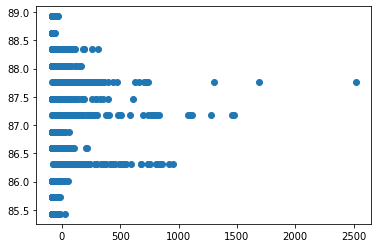

In [ ]:
plt.scatter(residual,y_pred)

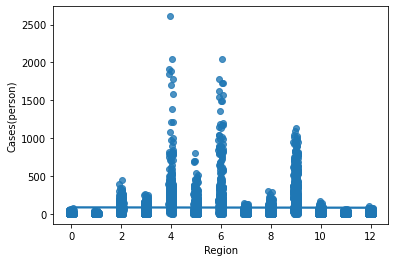

In [ ]:
 sns.regplot(x="Region", y='Cases(person)', data=cov_prl, x_jitter=.1)

In [ ]:
y_test1

array([ 9,  3, 18, ..., 24, 37,  2])

In [ ]:
y_pred

array([88.92558205, 86.59401296, 86.8854591 , ..., 86.01112069,
       88.92558205, 88.63413592])

In [ ]:
test_data=pd.read_excel('/content/gdrive/My Drive/Rabab_covid/test_data_updated.xlsx')

In [ ]:
test_data=test_data[ (test_data['Region']!='Total') ]

In [ ]:
test_data.columns

Index(['Indicator', 'Date', 'City', 'Region', 'Cases (person)'], dtype='object')

In [ ]:
test_data1=test_data.groupby(['Date','Region'],as_index=False)['Cases (person)'].sum()

In [6]:
test_data1

In [ ]:
test_data1.index = pd.to_datetime(test_data1.Date,format='%y/%m/%d', infer_datetime_format=True)
test_data1['Region']=test_data1['Region'].astype('category')
test_data1["Region"] = test_data1["Region"].cat.codes

In [ ]:
test_data11=test_data1.drop(['Date','Cases (person)'],axis=1)

In [ ]:
# scaler = MinMaxScaler()
# scaler.fit(test_data1) 
# scaled_train = scaler.transform(x_train1)#and divide every point by max value
# print(scaled_train[-5:])

[[0.38461538 1.27188082]
 [0.46153846 0.03910615]
 [0.46153846 0.26629423]
 [0.38461538 0.02420857]
 [0.46153846 0.03724395]]


In [ ]:
test_data

In [ ]:
test_data1['reg_pred']=regressor.predict(test_data11)

In [ ]:
test_data1

,Date,Region,Cases (person),reg_pred
Date,,,,
2021-08-17,2021-08-17,0,9,6.100125
2021-08-17,2021-08-17,1,10,11.297115
2021-08-17,2021-08-17,2,30,27.992737
2021-08-17,2021-08-17,3,41,49.100320
2021-08-17,2021-08-17,4,159,63.710466
...,...,...,...,...
2021-08-23,2021-08-23,8,34,38.099580
2021-08-23,2021-08-23,9,66,30.414805
2021-08-23,2021-08-23,10,16,21.437082


# **SVR **

In [ ]:
# kernel = ['poly']#, 'sigmoid', 'rbf'
# c = [0.01, 0.1, 1, 10]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]
# svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR()
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1,  verbose=1)
# svm_search.fit(x_train1, y_train1)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train1, y_train1)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pr=np.round(regressor.predict(x_test1),0)

In [ ]:
y_pr

array([39., 64., 28., ..., 12., 49., 58.])

In [ ]:
from sklearn.metrics import mean_squared_error 

Mse = mean_squared_error(y_test1, y_pr)
print("Intercept", regressor.intercept_)
print("MSE", Mse)


Intercept [30.39879682]
MSE 31238.791407867495


In [ ]:
y_test1-y_pr

array([ 22., -39., -50., ...,   4., -35., -50.])

In [ ]:
test_data1['svr_pred']=np.round(regressor.predict(test_data11),0)

In [ ]:
test_data1.to_excel('/content/gdrive/My Drive/predicted_sve.xlsx',index=True,encoding='utf-8')

In [ ]:
test_data1

,Date,Region,Cases (person),svr_pred
Date,,,,
2021-08-17,2021-08-17,0,9,7.0
2021-08-17,2021-08-17,1,10,11.0
2021-08-17,2021-08-17,2,30,28.0
2021-08-17,2021-08-17,3,41,49.0
2021-08-17,2021-08-17,4,159,64.0
...,...,...,...,...
2021-08-23,2021-08-23,8,34,39.0
2021-08-23,2021-08-23,9,66,31.0
2021-08-23,2021-08-23,10,16,21.0


Forcasting using ARIMA and SARIMA

In [ ]:
cov_data

In [ ]:
cov_data['Cases(person)'].unique()

array(['2', '1', '5', ..., '546', '409', '499'], dtype=object)

In [ ]:
#cov_data_sub=cov_data[ (cov_data['Indicator']=='Cases')&(cov_data['Region']!='Total') ]
cov_data_sub=cov_data[(cov_data['Daily / Cumulative']=='Daily')& (cov_data['Indicator']=='Cases')&(cov_data['Region']!='Total') ]

In [ ]:
cov_data_sub = cov_data_sub.rename(columns={'Cases (person)': 'Cases(person)'})

In [ ]:
cov_data1=cov_data_sub.groupby(['Date'],as_index=False)['Cases(person)'].sum()#.plot(kind='bar')

In [ ]:
cov_data1.index = pd.to_datetime(cov_data1.Date,format='%y/%m/%d', infer_datetime_format=True)

In [ ]:
cov_data1

,Date,Cases(person)
Date,,
2020-03-02,2020-03-02,1
2020-03-04,2020-03-04,1
2020-03-05,2020-03-05,3
2020-03-07,2020-03-07,2
2020-03-08,2020-03-08,4
...,...,...
2021-08-19,2021-08-19,458
2021-08-20,2021-08-20,409
2021-08-21,2021-08-21,384


In [ ]:
cov_prl=cov_data1.drop(['Date'],axis=1)
cov_prl.sort_values("Date")

,Cases(person)
Date,
2020-03-02,1
2020-03-04,1
2020-03-05,3
2020-03-07,2
2020-03-08,4
...,...
2021-08-19,458
2021-08-20,409
2021-08-21,384


In [ ]:
cov_prl.shape

(531, 1)

In [ ]:
len(cov_prl)

531

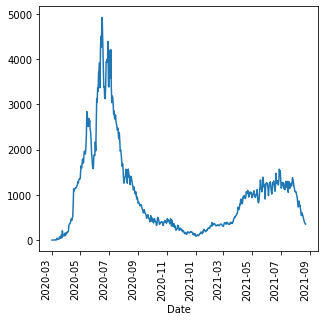

In [ ]:
cov_prl.groupby(['Date'])['Cases(person)'].sum().plot(kind='line',x='Date',y='Cases(person)',rot='vertical',figsize=(5,5))

In [ ]:
#H0: Not stationary
#H1:  stationary
from statsmodels.tsa.stattools import adfuller
result=adfuller(cov_prl['Cases(person)'])
#to help you, we added the names of every value
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

#P value >0.05 accept null hypothesis (non stationary )

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


{'adf': -1.829660927847281,
 'criticalvalues': {'1%': -3.443037261465839,
  '10%': -2.569750352856994,
  '5%': -2.8671357972350493},
 'icbest': 6579.904489711518,
 'nobs': 518,
 'pvalue': 0.36583843980580266,
 'usedlag': 19}

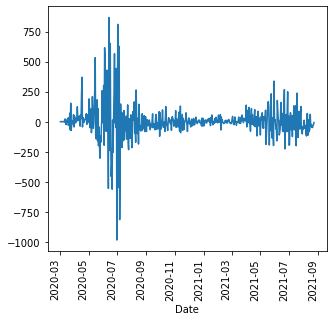

In [ ]:
#diffrence
cov_prl['1difference']=cov_prl['Cases(person)']-cov_prl['Cases(person)'].shift(1)
cov_prl.groupby(['Date'])['1difference'].sum().plot(kind='line',x='Date',y='1difference',rot='vertical',figsize=(5,5))

In [ ]:
result=adfuller(cov_prl['1difference'].dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -4.847322104959461,
 'criticalvalues': {'1%': -3.443037261465839,
  '10%': -2.569750352856994,
  '5%': -2.8671357972350493},
 'icbest': 6568.63281529008,
 'nobs': 518,
 'pvalue': 4.4114587930453845e-05,
 'usedlag': 18}

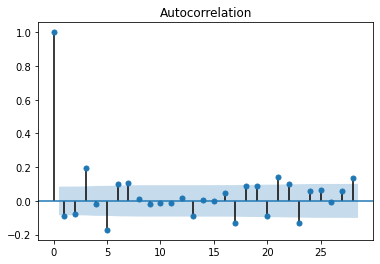

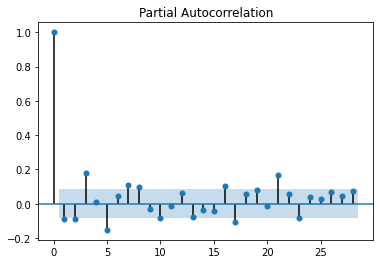

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig1=plot_acf(cov_prl['1difference'].dropna())
fig2=plot_pacf(cov_prl['1difference'].dropna())

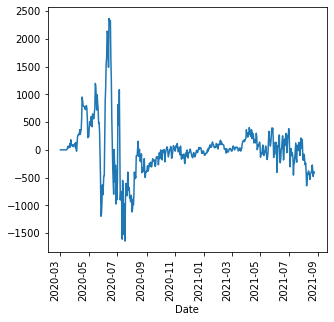

In [ ]:
#seasonal diffrences
cov_prl['Seasonal_Difference']=cov_prl['Cases(person)']-cov_prl['Cases(person)'].shift(12)
cov_prl.groupby(['Date'])['Seasonal_Difference'].sum().plot(kind='line',x='Date',y='Seasonal_Difference',rot='vertical',figsize=(5,5))

In [ ]:
result=adfuller(cov_prl['Seasonal_Difference'].dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -2.9885163191468083,
 'criticalvalues': {'1%': -3.443339692005083,
  '10%': -2.569821287318971,
  '5%': -2.8672689011327894},
 'icbest': 6586.945691357255,
 'nobs': 506,
 'pvalue': 0.035980837886225525,
 'usedlag': 19}

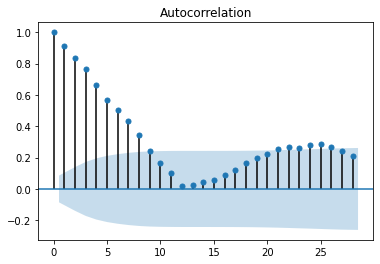

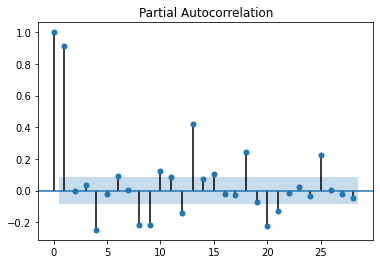

In [ ]:
fig1=plot_acf(cov_prl['Seasonal_Difference'].dropna()) #q value          q=0, p=2 d=1
fig2=plot_pacf(cov_prl['Seasonal_Difference'].dropna()) # p value

ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(cov_prl['Cases(person)'],order=(2,0,1))
result=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Cases(person)   No. Observations:                  538
Model:                     ARMA(2, 1)   Log Likelihood               -3424.705
Method:                       css-mle   S.D. of innovations            140.210
Date:                Thu, 26 Aug 2021   AIC                           6859.409
Time:                        07:00:36   BIC                           6880.848
Sample:                             0   HQIC                          6867.795
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 773.7460    513.580      1.507      0.133    -232.852    1780.344
ar.L1.Cases(person)     1.0839      0.222      4.877      0.000       0.648       1.519
ar.L2.Cases(person)    -0.0921      0.220     -0.419      0.676      -0.523       0.339
ma.L1.Cases(person)    -0.1850      0.216     -0.856      0.392      -0.609       0.239
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0092           +0.0000j            1.0092            0.0000
AR.2           10.7601           +0.0000j           10.7601            0.0000
MA.1            5.4041           +0.0000j            5.4041            0.0000
-----------------------------------------------------------------------------
"""

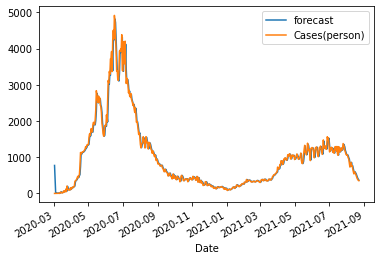

In [ ]:
from matplotlib import pyplot as plt
result.plot_predict(dynamic=False)
plt.show()

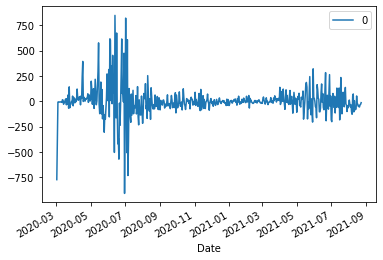

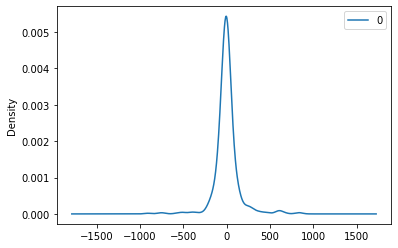

                0
count  538.000000
mean     1.673208
std    144.152107
min   -908.585058
25%    -41.509309
50%     -5.802906
75%     31.294964
max    846.096446


In [ ]:
from pandas import DataFrame
from matplotlib import pyplot

residuals = DataFrame(result.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
len(cov_prl)

538

In [ ]:
result.predict(start=400 ,end=538 , dynamic=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


400    889.703545
401    887.616608
402    886.487067
403    885.454992
404    884.440389
          ...    
534    807.585241
535    807.278146
536    806.973838
537    806.672291
538    806.373481
Length: 139, dtype: float64

In [ ]:
# from statsmodels.tsa.stattools import acf

# # Create Training and Test
# train = cov_prl[:400]#.value
# test = cov_prl[400:]
# #train

In [ ]:
# test

In [ ]:
# fc, se, conf = result.forecast(50, alpha=0.05)  # 95% conf

# # Make as pandas series
# fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# # Plot
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='training')
# plt.plot(test, label='actual')
# plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()

In [7]:
cov_prl[400:538]

SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1=SARIMAX(cov_prl['Cases(person)'],order=(2,0,1))
result1=model1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:          Cases(person)   No. Observations:                  538
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -3427.532
Date:                Thu, 26 Aug 2021   AIC                           6863.064
Time:                        07:02:05   BIC                           6880.216
Sample:                             0   HQIC                          6869.773
                                - 538                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0311      0.111      0.281      0.779      -0.186       0.248
ar.L2          0.9562      0.110      8.704      0.000       0.741       1.172
ma.L1          0.9551      0.115      8.284      0.000       0.729       1.181
sigma2      1.985e+04    445.217     44.576      0.000     1.9e+04    2.07e+04
===================================================================================
Ljung-Box (Q):                      143.75   Jarque-Bera (JB):              4586.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

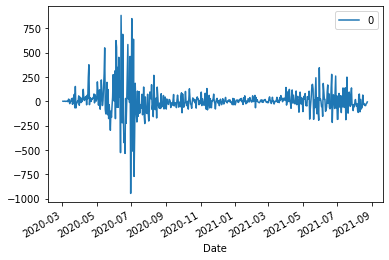

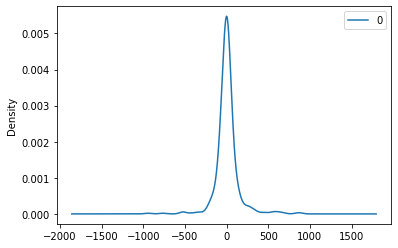

                0
count  538.000000
mean     7.209119
std    140.824621
min   -945.060606
25%    -37.364958
50%      0.070308
75%     34.852491
max    881.977849


In [ ]:
from pandas import DataFrame
from matplotlib import pyplot

residuals = DataFrame(result1.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
np.round(result1.predict(start=400 ,end=538 , dynamic=True),0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


400    894.0
401    890.0
402    883.0
403    879.0
404    871.0
       ...  
534    375.0
535    372.0
536    370.0
537    368.0
538    365.0
Length: 139, dtype: float64

In [ ]:
# fff=ff.to_frame()
# fff[131:138]

,0
531,385.268774
532,382.783654
533,380.341374
534,377.888872
535,375.477019
536,373.056656
537,370.674901


In [8]:
cov_prl[400:538]

Training and Testing ARIMA *model*

ARIMA

In [ ]:
cov_prl_=cov_prl.drop(['1difference','Seasonal_Difference'],axis=1)

355
183
predicted=329.906991, expected=335.000000
predicted=337.800425, expected=353.000000
predicted=354.752735, expected=356.000000
predicted=358.942759, expected=346.000000
predicted=350.578220, expected=338.000000
predicted=342.507165, expected=322.000000
predicted=327.441813, expected=317.000000
predicted=321.508701, expected=302.000000
predicted=307.404822, expected=331.000000
predicted=332.004224, expected=375.000000
predicted=373.858567, expected=384.000000
predicted=385.862956, expected=382.000000
predicted=385.305195, expected=357.000000
predicted=362.925594, expected=351.000000
predicted=355.334717, expected=390.000000
predicted=389.600520, expected=386.000000
predicted=389.153069, expected=390.000000
predicted=392.797614, expected=360.000000
predicted=366.322945, expected=351.000000
predicted=355.665894, expected=348.000000
predicted=352.077286, expected=345.000000
predicted=348.880667, expected=354.000000
predicted=356.593777, expected=393.000000
predicted=392.159613, expe

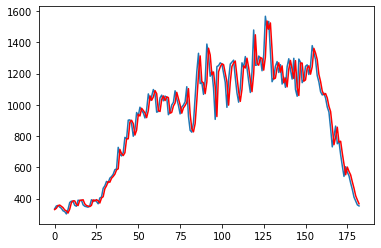

In [ ]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error
from math import sqrt
X = cov_prl_.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
print(len(train))
print(len(test))
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

SARIMA

355
183
predicted=326.000000, expected=335.000000
predicted=333.000000, expected=353.000000
predicted=351.000000, expected=356.000000
predicted=354.000000, expected=346.000000
predicted=347.000000, expected=338.000000
predicted=340.000000, expected=322.000000
predicted=324.000000, expected=317.000000
predicted=319.000000, expected=302.000000
predicted=304.000000, expected=331.000000
predicted=329.000000, expected=375.000000
predicted=368.000000, expected=384.000000
predicted=380.000000, expected=382.000000
predicted=382.000000, expected=357.000000
predicted=360.000000, expected=351.000000
predicted=353.000000, expected=390.000000
predicted=386.000000, expected=386.000000
predicted=384.000000, expected=390.000000
predicted=390.000000, expected=360.000000
predicted=363.000000, expected=351.000000
predicted=354.000000, expected=348.000000
predicted=349.000000, expected=345.000000
predicted=346.000000, expected=354.000000
predicted=353.000000, expected=393.000000
predicted=388.000000, expe

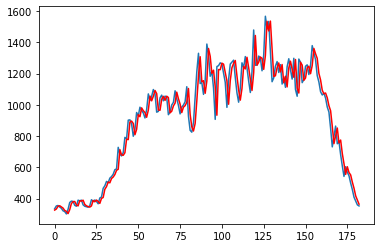

In [ ]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX

X = cov_prl_.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
print(len(train))
print(len(test))
# walk-forward validation
for t in range(len(test)):
	model = SARIMAX(history, order=(2,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (np.round(yhat,0), obs))
# evaluate forecasts
print('MSE: %.3f' % mean_squared_error(test, predictions))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()